# **3. MAPAS AUTOORGANIZATIVOS (SOM)**

Como hemos visto en la presentación de teoría, el Mapa Autoorganitivo de Kohonen (SOM) es un tipo de red neuronal artificial (ANN) que se entrena utilizando el aprendizaje no supervisado para producir una representación discreta de baja dimensión (típicamente bidimensional) del espacio de entrada de las muestras de entrenamiento, denominada mapa y, por lo tanto, esté método puede servir incluso para realizar reducción de dimensionalidad. Los Mapas Autoorganizativos se distinguen de otras redes neuronales artificiales en que aplican el aprendizaje competitivo en
oposición al aprendizaje de ajuste del  error (como la propagación hacia atrás con el descenso de gradiente), y usan una función de vecindad para preservar las propiedades topológicas del espacio
de entrada.

Instalamos minisom e importamos todas las bibliotecas necesarias para la práctica.

In [1]:
pip install minisom #Instalamos minisom

  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=a5eb9a29f02ec0cd80581383906008d38e10397a3fbce23edf3d84dacd816949
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

A continuación, cargaremos nuestro archivo de datos:

In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = '/content/drive/My Drive/'

dataset = pd.read_csv(DATA_DIR + 'Credit_Card_Applications.csv')
dataset.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Como podemos ver, en la tabla que se nos muestra con la sentencia “head”, tenemos valores categóricos y continuos, y en estos datos tenemos “fraudes” que tenemos que detectar, las columnas son información de los clientes y cada fila representa un cliente. Cuando hablamos de que las SOMS van a buscar patrones, en este caso serán tipos de clientes. Lo que haremos se llama
segmentación de clientes, y uno de esos segmentos calculados va a contener clientes que son potencialmente fraudulentos.

Todos los Clientes serán el valor de entrada, y todos estos puntos de entrada van a ser organizados en un nuevo espacio vectorial de entrada, y entre este espacio y el de salida, cada neurona va a ser
inicializada con una cantidad de pesos igual a la cantidad de atributos, y la salida va a ser la neurona más cercana al tipo de cliente, esta neurona se llama BMU. BMU es la neurona que tiene un valor más similar al cliente que le estamos pasando, y así el mapa se irá ajustando a nuestros datos y por cada repetición (Época) nuestro espacio de entrada pierde dimensiones, y cuando el espacio vectorial ya no se hace más pequeño, es el momento en el cual obtenemos nuestro SOM.

Crearemos nuestro conjunto X y nuestro vector de labels. Escalaremos nuestros valores de X entre 0 y 1 para que no haya grandes diferencias entre las variables usadas.


In [0]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

Ahora vamos a construir nuestro SOM:

In [0]:
#Inicializamos un mapa de 10*10 SOM
som = MiniSom(x = 10, y = 10, input_len = X.shape[1],
              sigma = 1.0, learning_rate = 0.5)

Los valores X e Y van a ser el tamaño de nuestro espacio vectorial de salida. En este caso como no tenemos tantos valores de entrada, quiero que mi mapa sea de 10 x 10 (2 Dimensiones) en caso de tener una entrada mucho más grande necesitaríamos que nuestro mapa fuera más grande. El siguiente parámetro es input_len, que corresponde a la dimensión de nuestros datos o el número 
5 de columnas que le estamos pasando, X contiene la ID del cliente, en otros casos no serviría de nada, pero aquí nos servirá para identificar a los potenciales clientes fraudulentos. sigma, es el valor del radio que tendrán las BMU para actualizar las neuronas más cercanas. lerning_rate, este
parámetro define cuánto vamos a actualizar las neuronas más cercanas a la BMU por cada época (razón de aprendizaje). Ahora vamos a entrenarlo sobre nuestros datos para ello vamos a inicializar los pesos de manera aleatoria y pasaremos a entrenar.


In [0]:
som.random_weights_init(X)
som.train_random(X, num_iteration = 150, verbose = 1) #Le metemos 150 épocas

 [ 150 / 150 ] 100% - 0:00:00 left 
 quantization error: 0.025777259151498023
 topographic error: 0.14057971014492754


## Visualizando los datos

Una vez entrenado nuestro SOM tenemos que visualizar los resultados obtenidos, para ello vamos a representar gráficamente el SOM como una malla 2D que va a contener a todas las neuronas BMU. De cada una de estas BMU vamos a obtener lo que nos interesa, que es la distancia intermedia promedio entre estas neuronas. Mientras más bajo sea este número, más cerca estará
este nodo de nuestro vecindario, y mientras más grande sea el número más lejos estará y si la mayoría de nuestras BMU representan las reglas que identificamos, la neurona que estaría lejos de esta mayoría seria nuestro cliente fraudulento.

Para visualizarlo usaremos colores, donde los BMU estarán coloreadas y mientras más grande sea la distancia intermedia promedio, más blanco será el color. No vamos a usar Matplotlib para esto porque el gráfico que necesitamos hacer es más específico, como estamos haciendo un SOM,
necesitamos montar la visualización desde 0. Vamos a importar las siguientes funciones de pylab.

In [0]:
from pylab import bone, pcolor, colorbar, plot, show

Primero necesitamos inicializar el gráfico, que va a ser una ventana donde construiremos nuestro gráfico, para ello usaremos la función bone, que nos proporciona una ventana en blanco. Lo siguiente que vamos a hacer es poner las diferentes BMU en el mapa, para ello pondremos en nuestro mapa la información de nuestra Distancia Promedio para todos los BMU que nuestro 6 SOM identificó, para ello usaremos colores, que van a representar los valores promedios de todas las Distancias Intermedias Promedio. Para ello usaremos la función pcolor y dentro de ella pondré todas estas distancias intermedias de todos nuestros BMU en nuestro SOM, para obtener las distancias intermedias, tenemos un método que se llama distance_map, y esta función devuelve todas las distancias promedio en una matriz, y para pesar a la función pcolor los valores en el orden correcto, vamos a transponer la matriz con
el método T, que nos devuelve la transpuesta de la misma matriz.


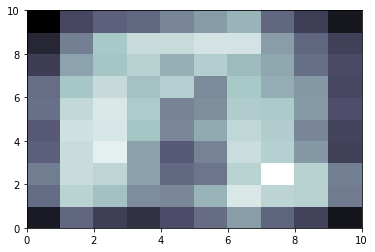

In [0]:
bone()
pcolor(som.distance_map().T)

Todos estos colores corresponden a la Distancia intermedia promedio de todas las neuronas, pero ahora quiero agregar más información, para saber si el blanco corresponde a una distancia grande o pequeña. Para agregar esta leyenda haremos lo siguiente.

<function matplotlib.pyplot.show>

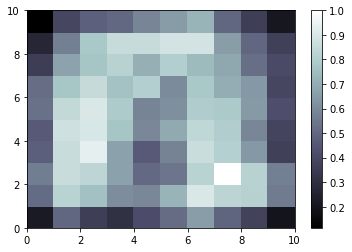

In [0]:
bone()
pcolor(som.distance_map().T)
colorbar()
show

Esta barra de colores es el rango de distancias intermedias entre las neuronas, estos valores están normalizados lo que significa que van del 0 al 1 y claramente podemos ver que los valores más altos es decir los que están más distantes son los blancos y las más cercanos son más oscuros, y como explicamos antes ahora podemos saber dónde están los fraudes y son los valores más claros. Ahora haremos marcadores para ver qué clientes son fraudulentos y los que no, porque los clientes que son fraudulentos y fueron aprobados son más relevantes que los que no, sería interesante saber dónde están los clientes dentro del SOM.


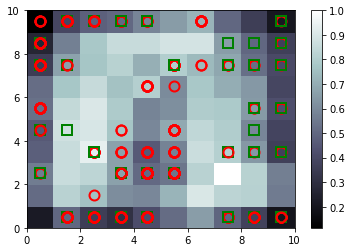

In [0]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers [Y[i]],
       markeredgecolor = colors[Y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show ()

Necesitamos definir los marcadores y los colores, en este caso los marcadores son un círculo rojo para clientes no aprobados y un cuadrado verde para los aprobados.
Necesitamos un índice y un valor de x, el índice es para buscar en la matriz Y si fueron o no aprobados, y las x son los datos individualmente. w va a ser el valor que representa si nuestro nodo es una BMU, y para obtenerlo necesitamos usar la función winner de nuestro mapa, que devuelve el BMU para nuestro cliente específico. Esto nos devolverá un valor que representa las coordenadas de nuestro nodo ganador al que pertenece nuestro dato pero estos w[0] y w[1] representan las esquinas de este cuadrado así que para llevarlos al centro necesitamos sumarle 0.5 Lo siguiente es buscar si el cliente fue aprobado o no en nuestra matriz Y, por lo que vamos a
tomar el marcador y el color correspondiente al valor de Y que obtuvimos (0 o 1), y lo siguientees configurar un poco la manera en que se mostraran estos valores.

El marcador con el círculo nos dice que no se aprobó el cliente, que fue detectado como fraude, el cuadrado verde nos dice que sí fue aprobado, y cuando salen ambos significa que se aprobaron tanto como se rechazaron, por lo que vemos que algunos fraudes si fueron aprobados como clientes
legítimos y vice-versa. Por último, vamos a extraer los valores de los clientes que son fraudulentos. Para hacer esto, desafortunadamente, no tenemos una función de mapeo inverso tenemos que tener la lista de clientes directamente de nuestros nodos ganadores, pero podemos usar una función de
la librería que contiene todos los valores de los nodos ganadores que nosotros le pasemos, eso significa que primero debemos obtener esos nodos ganadores, con esto buscamos los nodos donde la distancia a las demás neuronas es mayor (color blanco). En estos nodos blancos la distancia de las neuronas difiere mucho por lo que si encontramos ejemplos de cuadrados verdes y circulos rojos, habremos identificado un ejemplo de fraude ya que dan una  información de que o se han equivocado al aprobarlos y deben ser no aprobados(fraudulentos) o no han sido aprobados y deberían haberlo sido.

Primero vamos a obtener los valores de cada nodo con la siguiente línea de código


In [0]:
mappings = som.win_map(X)

ahora para obtener el valor de nuestro nodo, en este caso el (2,3),
hacemos lo siguiente

In [0]:
frauds = np.array(mappings[(2,3)])

con esta línea obtendremos todos los valores de los posibles fraudes y para revisar qué valores son debemos transformarlos inversamente a nuestros valores originales


In [0]:
frauds = sc.inverse_transform(frauds)

y así obtenemos todos los valores de los parámetros de los clientes fraudulentos:

In [0]:
print(frauds)

[[1.5631685e+07 1.0000000e+00 2.3170000e+01 0.0000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 8.5000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5753591e+07 1.0000000e+00 2.6750000e+01 1.1250000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 1.2500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.2990000e+03]
 [1.5587297e+07 1.0000000e+00 1.8420000e+01 1.0415000e+01 1.0000000e+00
  6.0000000e+00 4.0000000e+00 1.2500000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 3.7600000e+02]
 [1.5682540e+07 1.0000000e+00 6.2500000e+01 1.2750000e+01 1.0000000e+00
  8.0000000e+00 8.0000000e+00 5.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.1200000e+02 1.0000000e+00]
 [1.5797246e+07 1.0000000e+00 2.3420000e+01 5.8500000e-01 2.0000000e+00
  8.0000000e+00 8.0000000e+00 8.5000000e-02 1.0000000e+00 0.

# **4. REDES NEURONALES DE FUNCION BASE RADIAL**

Las redes neuronales de Función Base Radial son modelos de aprendizaje automático que no son especialmente muy utilizados actualmente, pero en cambio son rápidos, efectivos y se podía decir que incluso hasta intuitivos. Esta red neuronal cuenta de 3 capas y podrá utilizarse tanto en
problemas de clasificación como regresión. Veremos un ejemplo de regresión. 

Una red neuronal de base radial tiene unos aspectos muy similares a lo que Fourier dictaminó, *toda función puede representarse como una serie trigonométrica*:

$$f(t) =  \sum_{n\in\mathbb{Z}} c_n e^{int}.$$

Más tarde se probó que esta igualdad solo se puede dar cuando el espacio de funciones que queremos reprentar es $L^1(\mathbb{T})$, funciones periódicas lebesgue integrables. 

En este caso queremos aproximar una función continua por una suma de funciones exponenciales negativas, campanas de Gauss. Estas funciones son continuas y de soporte compacto por lo tanto densas en el espacio $L^1$. Queremos estimar tres parámetros: los pesos de la red, que en este caso harian de coeficientes de Fourier; la amplitud  y el punto donde está centrada la campana de Gauss. Los pesos los calcularemos mediante el método del gradiente descendiente y el backpropagation de una función coste. Los otros dos parámetros serán inferidos mediante técnicas de aprendizaje no supervisado, k-means para los centros y para la amplitud podemos suponer siempre la misma o una distinta para cada grupo formado por el k-means.

## Código para implementar una Red Neuronal RBF

Primero definimos la familia de funciones exponenciales

In [0]:
def rbf(x ,c, s):
  return np.exp(-1 / (2 * s**2) * (x - c)**2)

Ahora necesitaremos usar el algoritmo de agrupación k-means para determinar los centros de los cluster. El siguiente código nos da los centros de clúster y las desviaciones estándar de los clústeres.

In [0]:
def kmeans(X, k):
  #Seleccionamos aleatoriamente los clusters iniciales
  clusters = np.random.choice(np.squeeze(X), size = k)
  prevClusters = clusters.copy()
  stds = np.zeros(k)
  converged = False

  while not converged:

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis = 1)

    for i in range(k):
      pointsForCluster = X[closestCluster == i]
      if len(pointsForCluster) > 0:
        clusters[i] = np.mean(pointsForCluster, axis = 0)

    converged = np.linalg.norm(clusters - prevClusters) < 1e-6
    prevClusters = clusters.copy()
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis = 1)

    clustersWithNoPoints = []

    for i in range(k):
      pointsForCluster = X[closestCluster == i]
      if len(pointsForCluster) < 2:
        clustersWithNoPoints.append(i)
        continue
      else:
        stds[i] = np.std(X[closestCluster == i])
      
    if len(clustersWithNoPoints) > 0:
      pointsToAverage = []
      for i in range(k):
        if i not in clustersWithNoPoints:
          pointsToAverage.append(X[closestCluster == i])
      pointsToAverage = np.concatenate(pointsToAverage).ravel()
      stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    
    return clusters, stds
      
    

Este código implementa el algoritmo de clustering k-means y calcula las desviaciones estándar. Si hay un cluster con ninguno o uno de los puntos asignados, simplemente promediamos la desviación
estándar de los otros grupos. (No podemos calcular la desviación estándar sin puntos de datos, y la desviación estándar de un solo punto de datos es 0).

Ahora implementamos la clase RBF:

In [0]:
class RBFNet(object):

  def __init__(self, k = 2, lr = 0.01, epochs = 100, rbf = rbf, inferStds = True):
    self.k = k
    self.lr = lr
    self.epochs = epochs
    self.rbf = rbf
    self.inferStds = inferStds

    self.w = np.random.rand(k)
    self.b = np.random.rand(1)

  def fit(self, X, y):
    if self.inferStds:
      self.centers, self.stds = kmeans(X, self.k)
    else:
      self.centers, _ = kmeans(X, self.k)
      dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
      self.stds = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

    for epoch in range(self.epochs):
      for i in range(X.shape[0]):
        a = np.array([self.rbf(X[i], c, s) for c, s in zip(self.centers, self.stds)])
        F = a.T.dot(self.w) + self.b
        loss = (y[i] - F).flatten() ** 2
        print('Loss: {0:.2f}'.format(loss[0]))
        error = -(y[i]- F).flatten()
        self.w = self.w - self.lr * a * error
        self.b = self.b - self.lr * error

  def predict(self, X):
    y_pred = []
    for i in range(X.shape[0]):
      a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
      F = a.T.dot(self.w) + self.b
      y_pred.append(F)
    return np.array(y_pred)


Ya podemos utilizar nuestro código para un ejemplo. Para nuestros datos de entrenamiento, generaremos 100 muestras de la función seno. Luego, agregaremos un poco de ruido uniforme a nuestros datos.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise
rbfnet = RBFNet(lr=1e-2, k=2)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

Se han truncado las últimas 5000 líneas del flujo de salida.
Loss: 0.03
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.02
Loss: 0.00
Loss: 0.03
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss

Dibujamos nuestra función aproximada para compararla con la real

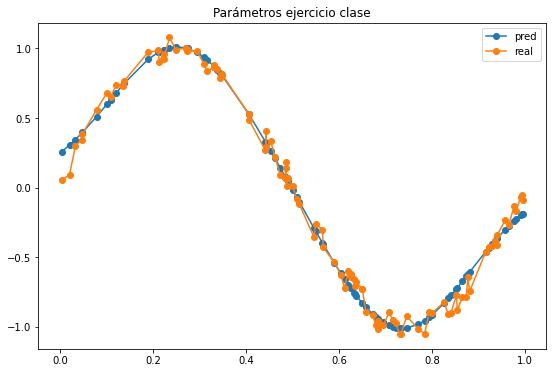

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(X, y_pred, 'o-', label='pred')
plt.plot(X, y, 'o-', label='real')
plt.legend(loc='upper right')
plt.title('Parámetros ejercicio clase')
plt.show()

# **Nuevos experimentos**

Haremos distintos experimentos aumentando y disminuyendo el número de elementos en la base radial:

Se han truncado las últimas 5000 líneas del flujo de salida.
Loss: 0.06
Loss: 0.07
Loss: 0.12
Loss: 0.13
Loss: 0.04
Loss: 0.01
Loss: 0.05
Loss: 0.00
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.03
Loss: 0.15
Loss: 0.10
Loss: 0.35
Loss: 0.33
Loss: 0.22
Loss: 0.33
Loss: 0.35
Loss: 0.20
Loss: 0.21
Loss: 0.27
Loss: 0.15
Loss: 0.16
Loss: 0.14
Loss: 0.05
Loss: 0.06
Loss: 0.02
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.07
Loss: 0.08
Loss: 0.09
Loss: 0.06
Loss: 0.07
Loss: 0.07
Loss: 0.05
Loss: 0.02
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.03
Loss: 0.02
Loss: 0.01
Loss: 0.07
Loss: 0.01
Loss: 0.05
Loss: 0.01
Loss: 0.03
Loss: 0.01
Loss: 0.01
Loss: 0.06
Loss: 0.03
Loss: 0.06
Loss: 0.09
Loss: 0.12
Loss: 0.15
Loss: 0.17
Loss: 0.27
Loss: 0.16
Loss: 0.19
Loss

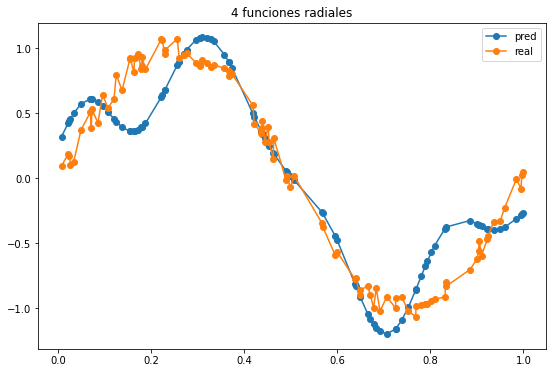

In [30]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise
rbfnet = RBFNet(lr=1e-2, k=4)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(X, y_pred, 'o-', label='pred')
plt.plot(X, y, 'o-', label='real')
plt.legend(loc='upper right')
plt.title('4 funciones radiales')
plt.show()

Al aumentar el número de funciones en la base también aumentamos el número de parámetros a estimar, observamos que la función perdida empieza oscilar los valores tal vez necesitemos disminuir la tasa de aprendizaje.

Se han truncado las últimas 5000 líneas del flujo de salida.
Loss: 0.05
Loss: 0.03
Loss: 0.01
Loss: 0.05
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.05
Loss: 0.03
Loss: 0.01
Loss: 0.03
Loss: 0.05
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.05
Loss: 0.10
Loss: 0.12
Loss: 0.19
Loss: 0.28
Loss: 0.34
Loss: 0.34
Loss: 0.26
Loss: 0.26
Loss: 0.11
Loss: 0.16
Loss: 0.19
Loss: 0.15
Loss: 0.10
Loss: 0.03
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.07
Loss: 0.09
Loss: 0.07
Loss: 0.21
Loss: 0.23
Loss: 0.21
Loss: 0.10
Loss: 0.15
Loss: 0.20
Loss: 0.27
Loss: 0.26
Loss: 0.31
Loss: 0.38
Loss: 0.27
Loss: 0.27
Loss: 0.52
Loss: 0.64
Loss: 1.13
Loss: 1.15
Loss: 1.68
Loss: 1.36
Loss: 2.11
Loss: 2.06
Loss: 1.94
Loss: 2.30
Loss: 2.18
Loss: 2.73
Loss: 2.49
Loss: 2.45
Loss: 2.64
Loss: 2.38
Loss: 1.86
Loss: 2.07
Loss: 2.00
Loss: 1.64
Loss: 1.55
Loss: 1.18
Loss: 1.22
Loss: 1.04
Loss: 1.34
Loss: 1.36
Loss: 1.44
Loss

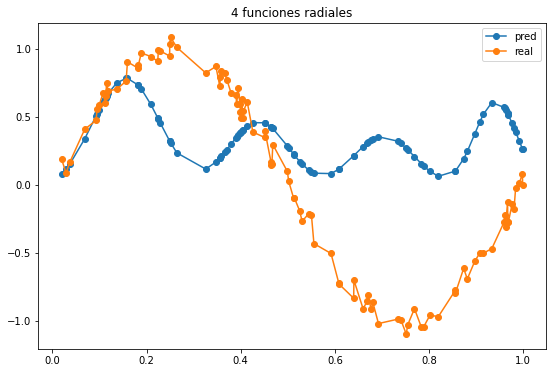

In [31]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise
rbfnet = RBFNet(lr=1e-4, k=4)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(X, y_pred, 'o-', label='pred')
plt.plot(X, y, 'o-', label='real')
plt.legend(loc='upper right')
plt.title('4 funciones radiales, disminuyendo lr')
plt.show()

La predicción se asemaja mucho a suma de funciones exponenciales, es posible que tengamos muy pocos ejemplos y una red demasiado compleja.

Se han truncado las últimas 5000 líneas del flujo de salida.
Loss: 0.00
Loss: 0.04
Loss: 0.00
Loss: 0.03
Loss: 0.04
Loss: 0.01
Loss: 0.04
Loss: 0.04
Loss: 0.02
Loss: 0.02
Loss: 0.03
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.03
Loss: 0.00
Loss: 0.05
Loss: 0.02
Loss: 0.02
Loss: 0.05
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.05
Loss: 0.06
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.00
Loss: 0.03
Loss: 0.03
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.03
Loss: 0.00
Loss: 0.05
Loss: 0.04
Loss: 0.01
Loss: 0.02
Loss: 0.06
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.02
Loss: 0.02
Loss: 0.03
Loss: 0.01
Loss: 0.02
Loss: 0.03
Loss: 0.03
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.04
Loss: 0.01
Loss: 0.01
Loss: 0.02
Loss: 0.03
Loss: 0.04
Loss: 0.01
Loss: 0.03
Loss: 0.02
Loss: 0.00
Loss: 0.05
Loss: 0.00
Loss: 0.05
Loss: 0.04
Loss: 0.00
Loss: 0.03
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.05
Loss: 0.04
Loss: 0.05
Loss: 0.02
Loss: 0.00
Loss

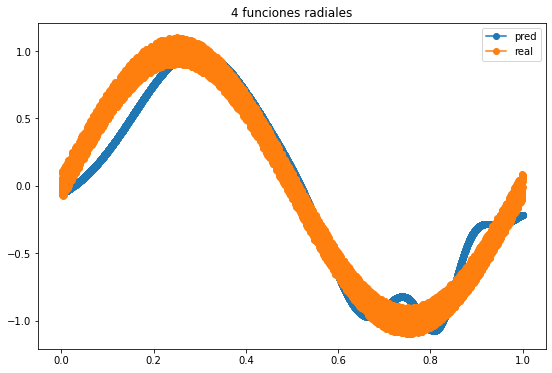

In [32]:
# sample inputs and add noise
NUM_SAMPLES = 10000
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise
rbfnet = RBFNet(lr=1e-4, k=4)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(X, y_pred, 'o-', label='pred')
plt.plot(X, y, 'o-', label='real')
plt.legend(loc='upper right')
plt.title('4 funciones radiales')
plt.show()

Al tener 4 exponenciales nuesra función bva a estar formada por 4 campanas, en este caso la función seno tiene dos extremos relativos y la función con la que vamos a apróximar tiene 4, por ello la función por muy fléxible que sea no se asemeja bien a la función seno. Para este problema el parámetro más optimo es 2.

Otro parámetro que podemos cambiar es la desviación estándar. Ahora supondremos todas las exponenciales tienen la misma amplitud.

Se han truncado las últimas 5000 líneas del flujo de salida.
Loss: 0.39
Loss: 0.39
Loss: 0.33
Loss: 0.33
Loss: 0.15
Loss: 0.21
Loss: 0.07
Loss: 0.07
Loss: 0.05
Loss: 0.05
Loss: 0.04
Loss: 0.03
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.01
Loss: 0.03
Loss: 0.07
Loss: 0.12
Loss: 0.13
Loss: 0.10
Loss: 0.16
Loss: 0.10
Loss: 0.16
Loss: 0.17
Loss: 0.10
Loss: 0.08
Loss: 0.16
Loss: 0.11
Loss: 0.06
Loss: 0.13
Loss: 0.09
Loss: 0.07
Loss: 0.13
Loss: 0.04
Loss: 0.07
Loss: 0.06
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.03
Loss: 0.05
Loss: 0.05
Loss: 0.05
Loss: 0.09
Loss: 0.11
Loss: 0.05
Loss: 0.07
Loss: 0.13
Loss: 0.03
Loss: 0.10
Loss: 0.05
Loss: 0.04
Loss: 0.10
Loss: 0.11
Loss: 0.09
Loss: 0.05
Loss: 0.07
Loss: 0.00
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss

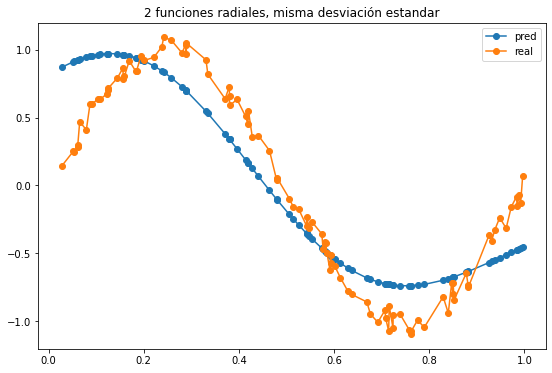

In [33]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise
rbfnet = RBFNet(lr=1e-2, k=2, inferStds = False)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(X, y_pred, 'o-', label='pred')
plt.plot(X, y, 'o-', label='real')
plt.legend(loc='upper right')
plt.title('2 funciones radiales, misma desviación estandar')
plt.show()

Al mantener la misma amplitud para todas las funciones exponenciales, la función predictora es más suave. 

Viendo los resultados la red más optima para el problema es una con dos elementos en la base y cuyas desviaciones típicas no son constantes. Podriamos afinar un poco mediante el uso de un lr más bajo y mayor número de épocas pero en el plot ya vemos que la función que seno que se estima es perfecta, un ajuste más preciso sería un sobreaprendizaje sobre los pequeños ruidos que le hemos incorporado a nuestros datos.

Se han truncado las últimas 5000 líneas del flujo de salida.
Loss: 0.02
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.04
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.03
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.05
Loss: 0.00
Loss: 0.03
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.03
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss

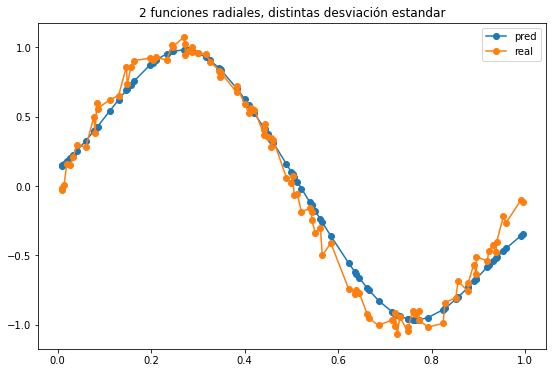

In [35]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise
rbfnet = RBFNet(lr=1e-2, k=2)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(X, y_pred, 'o-', label='pred')
plt.plot(X, y, 'o-', label='real')
plt.legend(loc='upper right')
plt.title('2 funciones radiales, distintas desviación estandar')
plt.show()